# Introduction Figures
## Hanna Asefaw

[1. Gauss Coefficients](#gauss)

[2. Energy Surface](#energy)

[3. Anisotropy Barrier](#anisotropy)

[4. Relaxation Time](#relaxation)

[5. TRM](#trm)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, LAND,OCEAN
from matplotlib import cm

from helper_functions import *

<a id = "gauss"></a>
# Gauss Coefficients

In [2]:
folder = "Figures/gauss/"

date= 2015
models, coefficients = get_igrf12()
coeff = coefficients[models.index(date)]

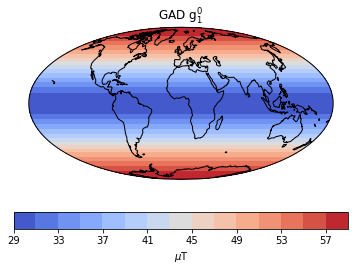

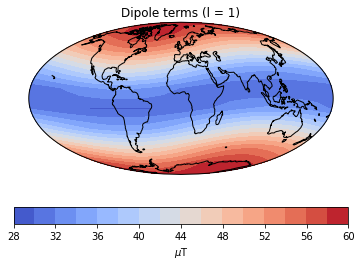

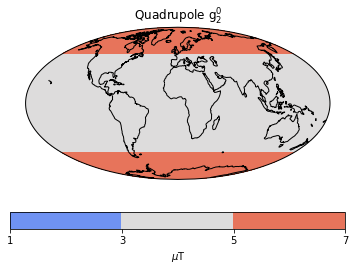

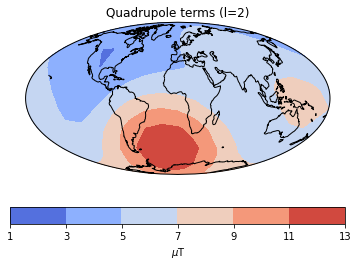

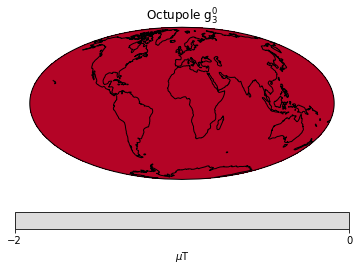

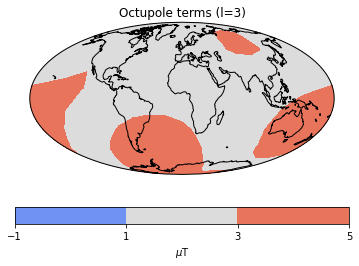

In [3]:
# gad
plt.figure()
gadOnly = coeff[0:1]
plotMagMap(date, gadOnly, title="GAD g$^0_1$")
plt.savefig(folder+"gad.eps")

#dipole
plt.figure()
dipoleAll = coeff[0:3]
plotMagMap(date, dipoleAll, title = "Dipole terms (l = 1)")
plt.savefig(folder+"dipole.eps")

# quadrupole only
plt.figure()
quadrupoleOnly = coeff[4:5]
plotMagMap(date, quadrupoleOnly, title = "Quadrupole g$^0_2$")
plt.savefig(folder+"qudrupole.eps")


#quadrupole all
plt.figure()
quadrupoleAll = coeff[4:9]
plotMagMap(date, quadrupoleAll, title = "Quadrupole terms (l=2)")
plt.savefig(folder+"quadrupoleTerms.eps")


# octupole only
plt.figure()
octupoleOnly = coeff[10:11]
plotMagMap(date, octupoleOnly, title="Octupole g$^0_3$")
plt.savefig(folder+"octupole.eps")


#octupole all
plt.figure()
octupoleAll=coeff[10:16]
plotMagMap(date, octupoleAll, title = "Octupole terms (l=3)")
plt.savefig(folder+"octupoleTerms.eps")

<a id = "energy"></a>
# Energy Surface

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


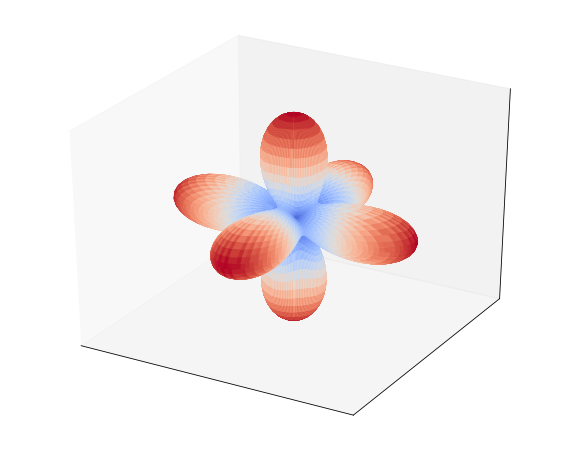

In [4]:
#anisotropy constants of magnetite at 300 K (J/m^3)         from pg. 47 of Stacey & Banarjee's Physical Principles of Rock Magnetism
k1, k2 = -1.35E4, -.44E4


#spherical 
angles = np.linspace(0, 2*np.pi, 120)
theta, phi = np.meshgrid(angles, angles)

#cartesian
ax = np.sin(theta)*np.cos(phi)
ay = np.sin(theta)*np.sin(phi)
az = np.cos(theta)


#calculate magnetocrystalline anisotropy energy
energy = k1*(ax**2 * ay**2 + ay**2 * az**2 + az**2 * ax**2) + k2* ax**2 * ay**2 * az**2

#shift energy (all positive)
energy+=np.amin(energy)*-1


ax*=energy
ay*=energy
az*=energy


colors = cm.coolwarm(energy/np.amax(energy))


fig = plt.figure(1, (10,8))
axis = fig.gca(projection = '3d')
energy_surface= axis.plot_surface(ax, ay, az, rstride = 1, cstride = 1, cmap = cm.coolwarm, facecolors = colors)

#fig.colorbar(energy_surface)

# Hide grid lines and axes ticks
axis.grid(False)
axis.set_xticks([])
axis.set_yticks([])
axis.set_zticks([])
    
plt.savefig("Figures/energy_surface_mag.eps")
plt.show();

<a id = "anisotropy"></a>
# Anisotropy Barrier

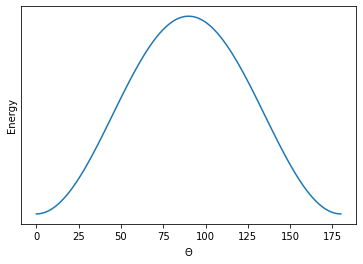

In [5]:
# absolute value of the magnetocrystalline shape anisotropy contant of magnetite J/m^3
k = 1.35E4
v = 1 #arbitrary
theta = np.linspace(0, np.pi, 100)
E = lambda angle: k*v*np.sin(angle)**2


fig= plt.figure()

plt.plot(np.degrees(theta), E(theta))

plt.xlabel('$\Theta$')
plt.ylabel("Energy")

ax = fig.gca()
ax.set_yticks([])
plt.savefig("Figures/anisotropy_barrier.eps")

<a id = "relaxation"></a>
# Relaxation Time

In [6]:
def calculate_Ku(Na):
    mu0 = 4 * np.pi *1E-7
    Ms =  480E3

    Nc = (1- Na)/2

    if (type(Na)==float):
        delta_N=0;
        if(Na >= Nc):
            delta_N = Na-Nc
        else:
            delta_N= Nc-Na
    else:
        delta_N = []
        for a, c in zip(Na, Nc):
            if(a >= c):
                delta_N.append(a-c)
            else:
                delta_N.append(c-a)

        delta_N = np.array(delta_N)
    Ku = .5 * delta_N * mu0 *Ms**2
    return Ku


def tau(temp, volume, Ku):
    C = 10E9
    boltzmann = 1.381 * 1E-23 #JK−1

    anisotropy_energy= Ku * volume
    thermal_energy = boltzmann * temp
    tau = 1/C * np.exp(anisotropy_energy/thermal_energy)
    
    return tau

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


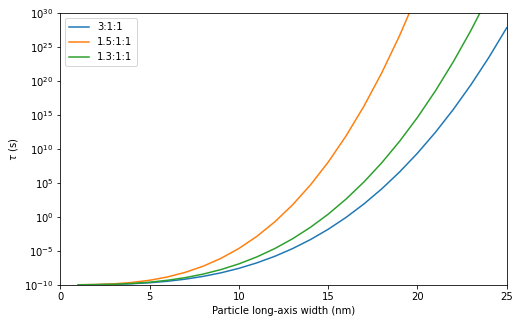

In [7]:
a_to_b =[3,  1.5, 1.3]
Nas = np.array([.11,.21, .28])  # from Stacey and Banerjee Figure (3.3?)
Kus= calculate_Ku(Nas)



r = np.arange(1E-9, 26E-9, 1E-9)
volumes = [4/3*np.pi*r *(r/ratio)*(r/ratio) for ratio in a_to_b]
temp = 20 + 273.15 

plt.figure(1, (8,5))
for i, Ku in enumerate(Kus):
    taus = tau(temp, volumes[i], Ku)

    plt.plot(r*1E9, taus, label = str(a_to_b[i])+":1:1")
    
ax = plt.gca()
ax.set_yscale('log')

plt.ylabel("$\\tau$ (s)")
plt.xlabel("Particle long-axis width (nm)")

plt.ylim(1E-10,1E30)
plt.xlim(0, 25);
plt.legend()
plt.savefig("Figures/relaxation_time.eps");

<a id = "trm"></a>
# TRM vs. B

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


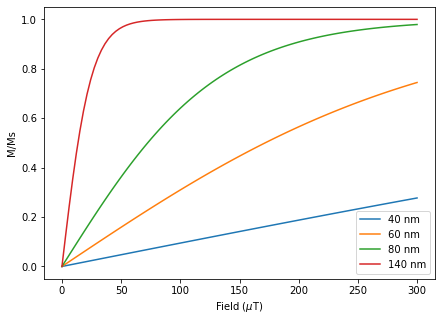

In [8]:
x, y = np.arange(50, 250, 50), np.arange(.8, .1, -.2)
mu0 = 4 * np.pi *1E-7
boltzmann = 1.381 * 1E-23 #JK−1
Ms =  480E3
temp = 20 + 273.15 


thermal_energy = boltzmann *temp

plt.figure(1, (7,5))

H = np.linspace(0, 300E-6, 100)
diameters = [40E-9, 60E-9, 80E-9,140E-9]
for i, d in enumerate(diameters):
    v = (d/2)**3
    M = np.tanh((v* Ms * H)/thermal_energy)
    plt.plot(H*1E6, M, label=str(int(np.ceil(d*1E9))) + " nm")

plt.xlabel("Field ($\mu$T)")
plt.ylabel("M/Ms")
plt.legend()
plt.savefig("Figures/TRM_B.eps");